# Visualize results

In [1]:
import csv
import json
import random
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
from tqdm import tqdm

/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
configs_db = pd.read_json('results/config.jsonl', lines=True).dropna()

In [3]:
configs_db

,vocab_size,seq_length,sparsity_index,nb_data,batch_size,nb_epochs,lambda_l1,lr,emb_dim,nb_emb,ffn_dim,ffn_bias,ffn_dropout,activation,seed,save_weights,interactive,id
1,2,12,5,2048,2048,1000,0.0001,0.010,2,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8
2,2,12,5,2048,2048,1000,0.0001,0.010,2,3,10,True,0,gelu,2.0,False,False,eab9a239d97e46d9b048d39ba818d926
3,2,12,5,2048,2048,1000,0.0000,0.001,2,3,10,True,0,gelu,7.0,False,False,12fb2d841e9248cdae117ccf5cffceb7
4,2,12,5,2048,2048,1000,0.0000,0.001,2,3,10,True,0,gelu,8.0,False,False,e15936dc73ca45b18e21a661443d9781
5,2,12,5,2048,32,1000,0.0001,0.001,2,3,10,True,0,gelu,2.0,False,False,5ff3c042ccbe4e46be11fb382a0fbfda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2,12,5,2048,32,1000,0.0001,0.010,2,3,10,True,0,gelu,8.0,False,False,b3c80d8219214000852c09a27c87c1ef
77,2,12,5,2048,32,1000,0.0001,0.010,2,3,10,True,0,gelu,4.0,False,False,cf228fa2c942463b9378a2bb58a64fef
78,2,12,5,2048,32,1000,0.0001,0.010,2,3,10,True,0,gelu,6.0,False,False,f31d1c7b954f48b99625ca7696b5c55b
79,2,12,5,2048,32,1000,0.0001,0.010,2,3,10,True,0,gelu,7.0,False,False,de6fe688715a45a19c4e123a456993d0


#### Debug

In [33]:
a = torch.stack([np.load('./results/0b6b72ff22594f91a8d7618816183eb2/accs.pkl', allow_pickle=True), np.load('./results/0b6b72ff22594f91a8d7618816183eb2/losses.pkl', allow_pickle=True)])

In [12]:
pd.DataFrame(a.T, columns=['acc', 'loss'])

,acc,loss
0,0.474121,0.994479
1,0.474121,0.971928
2,0.474121,0.951452
3,0.474121,0.932563
4,0.474121,0.914944
...,...,...
995,0.540039,0.688361
996,0.538574,0.688359
997,0.539062,0.688358
998,0.540039,0.688357


In [44]:
row = configs_db.iloc[0]
pd.DataFrame(
        torch.stack([
            np.load(f'./results/{row.id}/accs.pkl', allow_pickle=True),
            np.load(f'./results/{row.id}/losses.pkl', allow_pickle=True),
            np.load(f'./results/{row.id}/test_accs.pkl', allow_pickle=True),
            np.load(f'./results/{row.id}/test_losses.pkl', allow_pickle=True)
        ]).T,
        columns=['acc', 'loss', 'test_acc', 'test_loss'],
        index=np.arange(1, 1001)
    ).assign(**row.to_dict() | {'epoch': np.arange(1, 1001)}).reset_index()

,index,acc,loss,test_acc,test_loss,vocab_size,seq_length,sparsity_index,nb_data,batch_size,...,nb_emb,ffn_dim,ffn_bias,ffn_dropout,activation,seed,save_weights,interactive,id,epoch
0,1,0.304199,1.121874,0.283203,1.128062,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,1
1,2,0.437988,1.076825,0.414062,1.084278,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,2
2,3,0.498047,1.041459,0.485840,1.049656,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,3
3,4,0.509277,1.014917,0.499023,1.023722,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,4
4,5,0.509277,0.995406,0.499023,1.005054,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.529297,0.691170,0.509766,0.694712,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,996
996,997,0.529297,0.691169,0.509766,0.694711,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,997
997,998,0.529297,0.691168,0.509766,0.694711,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,998
998,999,0.529297,0.691167,0.508789,0.694710,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,999


#### Plain

In [4]:
data = pd.concat([
    pd.DataFrame(
        torch.stack([
            np.load(f'./results/{row.id}/accs.pkl', allow_pickle=True),
            np.load(f'./results/{row.id}/losses.pkl', allow_pickle=True),
            np.load(f'./results/{row.id}/test_accs.pkl', allow_pickle=True),
            np.load(f'./results/{row.id}/test_losses.pkl', allow_pickle=True)
        ]).T,
        columns=['acc', 'loss', 'test_acc', 'test_loss']
    ).assign(**row._asdict() | {'epoch': np.arange(1, 1001)})
    for row in tqdm(configs_db.itertuples(), total=len(configs_db)) if Path(f'./results/{row.id}').exists()
    # and (row.model_seed in subset_exp)
]).reset_index(drop=True)

100%|██████████| 80/80 [00:00<00:00, 203.75it/s]


In [5]:
data

,acc,loss,test_acc,test_loss,Index,vocab_size,seq_length,sparsity_index,nb_data,batch_size,...,nb_emb,ffn_dim,ffn_bias,ffn_dropout,activation,seed,save_weights,interactive,id,epoch
0,0.304199,1.121874,0.283203,1.128062,1,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,1
1,0.437988,1.076825,0.414062,1.084278,1,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,2
2,0.498047,1.041459,0.485840,1.049656,1,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,3
3,0.509277,1.014917,0.499023,1.023722,1,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,4
4,0.509277,0.995406,0.499023,1.005054,1,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.531250,0.690343,0.512207,0.693067,80,2,12,5,2048,32,...,3,10,True,0,gelu,9.0,False,False,612214f0706a43e8b6daef6cea6a29bd,996
79996,0.538086,0.690299,0.525391,0.692798,80,2,12,5,2048,32,...,3,10,True,0,gelu,9.0,False,False,612214f0706a43e8b6daef6cea6a29bd,997
79997,0.537109,0.690301,0.524414,0.693037,80,2,12,5,2048,32,...,3,10,True,0,gelu,9.0,False,False,612214f0706a43e8b6daef6cea6a29bd,998
79998,0.538574,0.690301,0.520508,0.692620,80,2,12,5,2048,32,...,3,10,True,0,gelu,9.0,False,False,612214f0706a43e8b6daef6cea6a29bd,999


In [17]:
data.columns

Index(['acc', 'loss', 'test_acc', 'test_loss', 'Index', 'vocab_size',
       'seq_length', 'sparsity_index', 'nb_data', 'batch_size', 'nb_epochs',
       'lambda_l1', 'lr', 'emb_dim', 'nb_emb', 'ffn_dim', 'ffn_bias',
       'ffn_dropout', 'activation', 'seed', 'save_weights', 'interactive',
       'id', 'epoch'],
      dtype='object')

batch_size  nb_epochs  lambda_l1  lr     emb_dim  nb_emb  ffn_dim  ffn_bias  ffn_dropout  activation
32          1000       0.0000     0.001  2        3       10       True      0            gelu          [Axes(0.125,0.53;0.775x0.35), Axes(0.125,0.11;...
                                  0.010  2        3       10       True      0            gelu          [Axes(0.125,0.53;0.775x0.35), Axes(0.125,0.11;...
                       0.0001     0.001  2        3       10       True      0            gelu          [Axes(0.125,0.53;0.775x0.35), Axes(0.125,0.11;...
                                  0.010  2        3       10       True      0            gelu          [Axes(0.125,0.53;0.775x0.35), Axes(0.125,0.11;...
2048        1000       0.0000     0.001  2        3       10       True      0            gelu          [Axes(0.125,0.53;0.775x0.35), Axes(0.125,0.11;...
                                  0.010  2        3       10       True      0            gelu          [Axes(0.125,0.53;0.775x0.

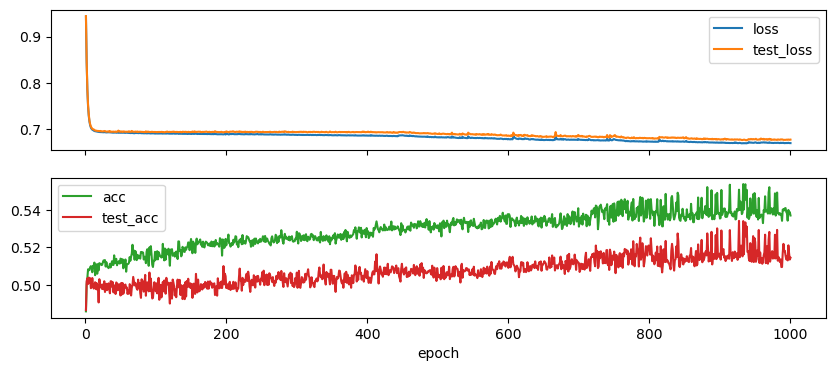

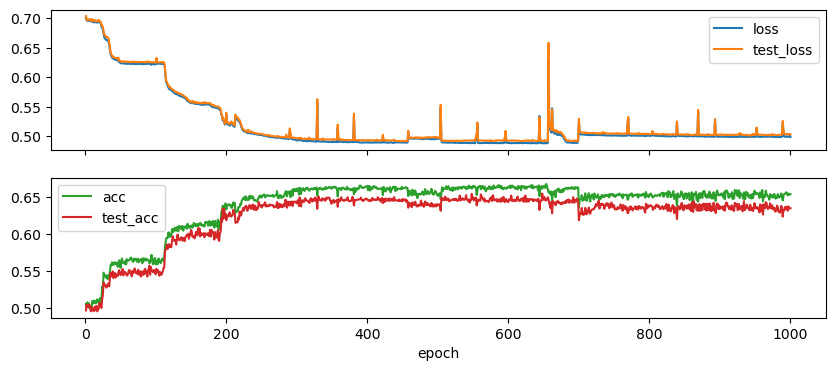

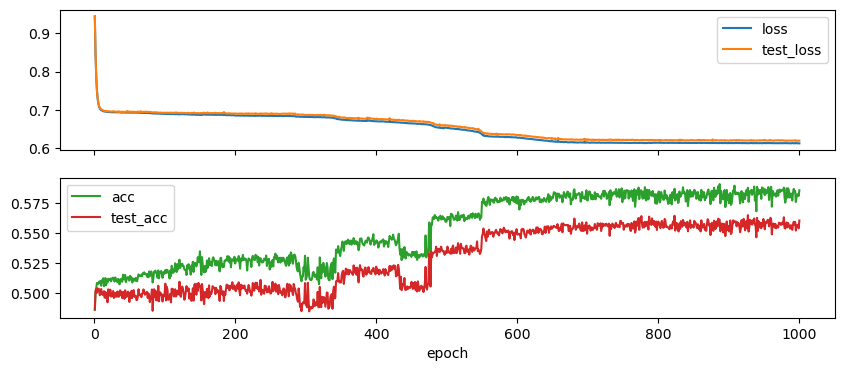

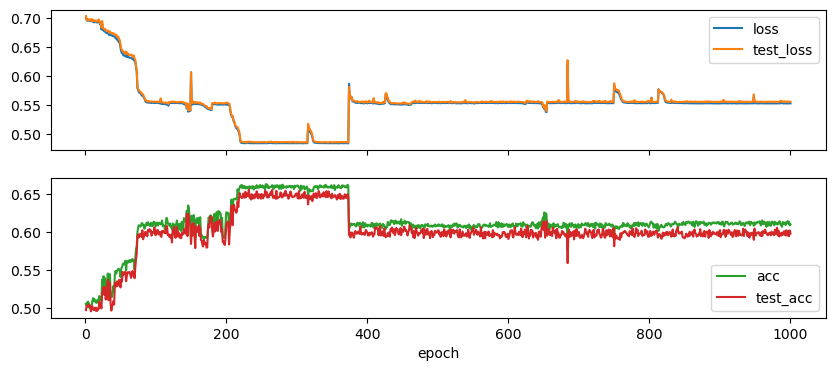

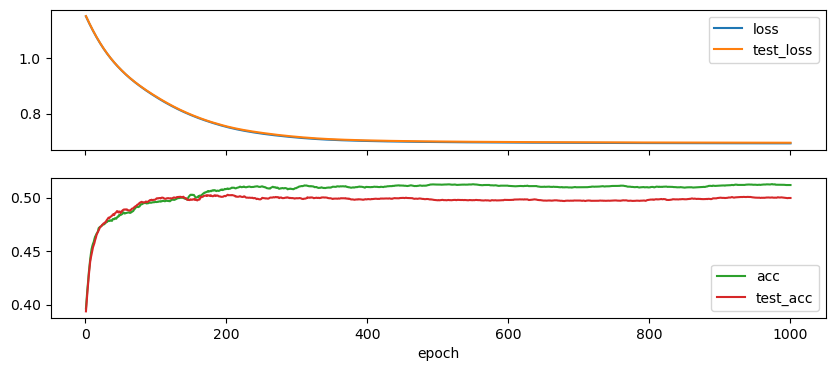

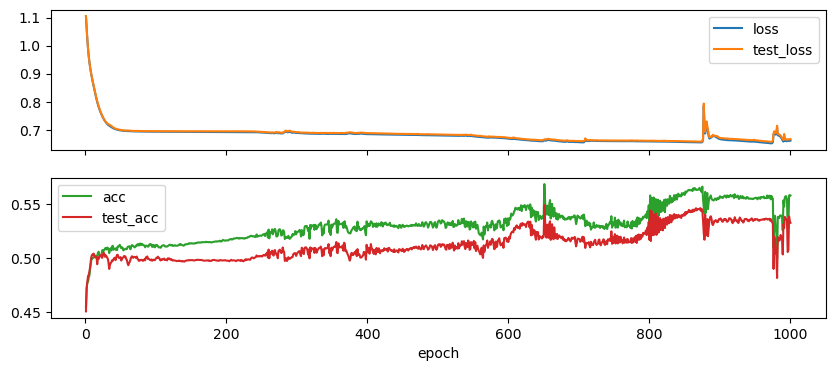

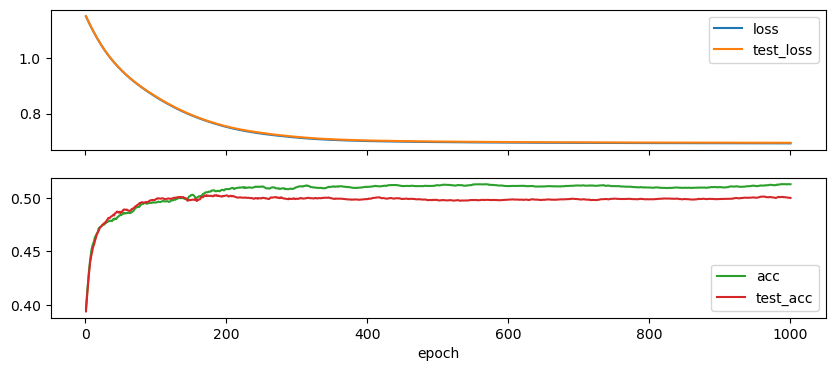

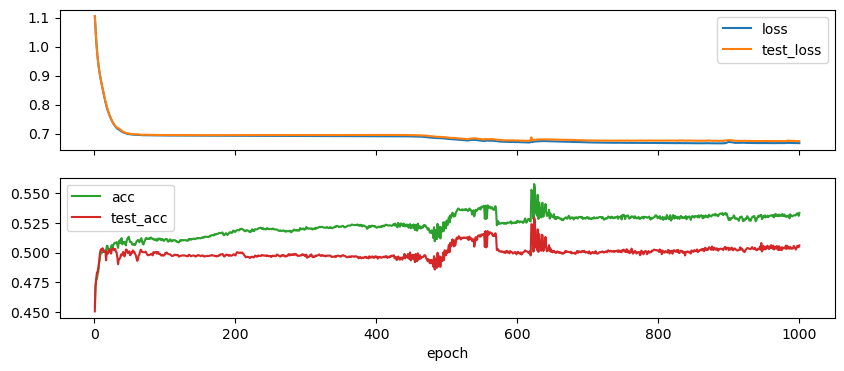

In [29]:
# data.groupby(['id']).plot(x='epoch', y=['loss', 'test_loss', 'acc', 'test_acc'], legend=True, subplots=[('loss', 'test_loss'), ('acc', 'test_acc')], figsize=(10, 4))
data.drop(columns=['id']).groupby(['batch_size', 'nb_epochs', 'lambda_l1', 'lr', 'emb_dim', 'nb_emb', 'ffn_dim', 'ffn_bias', 'ffn_dropout', 'activation', 'epoch']).mean().reset_index().groupby(['batch_size', 'nb_epochs', 'lambda_l1', 'lr', 'emb_dim', 'nb_emb', 'ffn_dim', 'ffn_bias', 'ffn_dropout', 'activation']).plot(x='epoch', y=['loss', 'test_loss', 'acc', 'test_acc'], legend=True, subplots=[('loss', 'test_loss'), ('acc', 'test_acc')], figsize=(10, 4))

## Mk1

In [101]:
EXP_DIR = Path('./results/Mk1')
configs_db = pd.read_json(EXP_DIR / 'config.jsonl', lines=True).dropna()

In [102]:
configs_db

,vocab_size,seq_length,sparsity_index,nb_data,batch_size,nb_epochs,lambda_l1,lr,emb_dim,nb_emb,ffn_dim,ffn_bias,ffn_dropout,activation,seed,save_weights,interactive,id
0,2,12,5,2048,2048,1000,0.0001,0.010,2,3,10,True,0,gelu,0,False,False,03873fe04f494b8a860d55d183283c4e
1,2,12,5,2048,2048,1000,0.0001,0.010,2,3,10,True,0,gelu,9,False,False,77bcaf3f2851426bb7114d3898583398
2,2,12,5,2048,2048,1000,0.0001,0.010,2,3,10,True,0,gelu,8,False,False,905248265da84ec9a60be80a6924b42b
3,2,12,5,2048,2048,1000,0.0001,0.010,2,3,32,True,0,gelu,5,False,False,8cf7dd39f2b747398aca730c4cb0cca3
4,2,12,5,2048,2048,1000,0.0001,0.010,2,3,32,True,0,gelu,6,False,False,bfc3b0c5e3ca4d16885b4ef30d9bdfb8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2,12,5,2048,32,1000,0.0000,0.001,2,3,32,True,0,gelu,9,False,False,36ad17f99ba540f1b7882a5f2ada3499
286,2,12,5,2048,32,1000,0.0000,0.001,2,3,32,True,0,gelu,7,False,False,1b26e0a456c0412892fcfc9f950c581f
287,2,12,5,2048,32,1000,0.0000,0.010,2,3,10,True,0,gelu,2,False,False,515dfe9d8df64c8a936b44905bcd8e33
288,2,12,5,2048,32,1000,0.0000,0.010,2,3,10,True,0,gelu,1,False,False,35cf19b1a56241bba88cd64d74a4478c


#### Debug

In [ ]:
a = torch.stack([np.load('./results/0b6b72ff22594f91a8d7618816183eb2/accs.pkl', allow_pickle=True), np.load('./results/0b6b72ff22594f91a8d7618816183eb2/losses.pkl', allow_pickle=True)])

In [ ]:
pd.DataFrame(a.T, columns=['acc', 'loss'])

,acc,loss
0,0.474121,0.994479
1,0.474121,0.971928
2,0.474121,0.951452
3,0.474121,0.932563
4,0.474121,0.914944
...,...,...
995,0.540039,0.688361
996,0.538574,0.688359
997,0.539062,0.688358
998,0.540039,0.688357


In [ ]:
row = configs_db.iloc[0]
pd.DataFrame(
        torch.stack([
            np.load(f'./results/{row.id}/accs.pkl', allow_pickle=True),
            np.load(f'./results/{row.id}/losses.pkl', allow_pickle=True),
            np.load(f'./results/{row.id}/test_accs.pkl', allow_pickle=True),
            np.load(f'./results/{row.id}/test_losses.pkl', allow_pickle=True)
        ]).T,
        columns=['acc', 'loss', 'test_acc', 'test_loss'],
        index=np.arange(1, 1001)
    ).assign(**row.to_dict() | {'epoch': np.arange(1, 1001)}).reset_index()

,index,acc,loss,test_acc,test_loss,vocab_size,seq_length,sparsity_index,nb_data,batch_size,...,nb_emb,ffn_dim,ffn_bias,ffn_dropout,activation,seed,save_weights,interactive,id,epoch
0,1,0.304199,1.121874,0.283203,1.128062,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,1
1,2,0.437988,1.076825,0.414062,1.084278,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,2
2,3,0.498047,1.041459,0.485840,1.049656,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,3
3,4,0.509277,1.014917,0.499023,1.023722,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,4
4,5,0.509277,0.995406,0.499023,1.005054,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.529297,0.691170,0.509766,0.694712,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,996
996,997,0.529297,0.691169,0.509766,0.694711,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,997
997,998,0.529297,0.691168,0.509766,0.694711,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,998
998,999,0.529297,0.691167,0.508789,0.694710,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,999


#### Plain

In [103]:
data = pd.concat([
    pd.DataFrame(
        torch.stack([
            np.load(EXP_DIR / f'{row.id}/accs.pkl', allow_pickle=True),
            np.load(EXP_DIR / f'{row.id}/losses.pkl', allow_pickle=True),
            np.load(EXP_DIR / f'{row.id}/test_accs.pkl', allow_pickle=True),
            np.load(EXP_DIR / f'{row.id}/test_losses.pkl', allow_pickle=True)
        ]).T,
        columns=['acc', 'loss', 'test_acc', 'test_loss']
    ).assign(**row._asdict() | {'epoch': np.arange(1, 1001)})
    for row in tqdm(configs_db.itertuples(), total=len(configs_db)) if Path(EXP_DIR / f'{row.id}').exists()
    # and (row.model_seed in subset_exp)
]).reset_index(drop=True)

100%|██████████| 290/290 [00:02<00:00, 134.53it/s]


In [104]:
data

,acc,loss,test_acc,test_loss,Index,vocab_size,seq_length,sparsity_index,nb_data,batch_size,nb_epochs,lambda_l1,lr,emb_dim,nb_emb,ffn_dim,ffn_bias,ffn_dropout,activation,seed,save_weights,interactive,id,epoch
0,0.477539,1.105971,0.492676,1.101292,1,2,12,5,2048,2048,1000,0.0001,0.010,2,3,10,True,0,gelu,9,False,False,77bcaf3f2851426bb7114d3898583398,1
1,0.486816,1.052654,0.502930,1.049206,1,2,12,5,2048,2048,1000,0.0001,0.010,2,3,10,True,0,gelu,9,False,False,77bcaf3f2851426bb7114d3898583398,2
2,0.488281,1.003372,0.509766,1.001195,1,2,12,5,2048,2048,1000,0.0001,0.010,2,3,10,True,0,gelu,9,False,False,77bcaf3f2851426bb7114d3898583398,3
3,0.483398,0.958723,0.496094,0.957844,1,2,12,5,2048,2048,1000,0.0001,0.010,2,3,10,True,0,gelu,9,False,False,77bcaf3f2851426bb7114d3898583398,4
4,0.506836,0.919133,0.494629,0.919557,1,2,12,5,2048,2048,1000,0.0001,0.010,2,3,10,True,0,gelu,9,False,False,77bcaf3f2851426bb7114d3898583398,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288995,0.637207,0.551145,0.610352,0.573786,289,2,12,5,2048,32,1000,0.0000,0.001,2,3,512,True,0,gelu,0,False,False,3b147b2b7f3a4c738734a27c3f88f040,996
288996,0.640137,0.548843,0.617188,0.572563,289,2,12,5,2048,32,1000,0.0000,0.001,2,3,512,True,0,gelu,0,False,False,3b147b2b7f3a4c738734a27c3f88f040,997
288997,0.655273,0.552117,0.625000,0.577741,289,2,12,5,2048,32,1000,0.0000,0.001,2,3,512,True,0,gelu,0,False,False,3b147b2b7f3a4c738734a27c3f88f040,998
288998,0.657227,0.547454,0.622070,0.572788,289,2,12,5,2048,32,1000,0.0000,0.001,2,3,512,True,0,gelu,0,False,False,3b147b2b7f3a4c738734a27c3f88f040,999


In [105]:
data.columns

Index(['acc', 'loss', 'test_acc', 'test_loss', 'Index', 'vocab_size',
       'seq_length', 'sparsity_index', 'nb_data', 'batch_size', 'nb_epochs',
       'lambda_l1', 'lr', 'emb_dim', 'nb_emb', 'ffn_dim', 'ffn_bias',
       'ffn_dropout', 'activation', 'seed', 'save_weights', 'interactive',
       'id', 'epoch'],
      dtype='object')

In [106]:
pd.set_option('display.max_columns', None)

In [107]:
data.query('epoch == 999 and test_acc > 0.8')

,acc,loss,test_acc,test_loss,Index,vocab_size,seq_length,sparsity_index,nb_data,batch_size,nb_epochs,lambda_l1,lr,emb_dim,nb_emb,ffn_dim,ffn_bias,ffn_dropout,activation,seed,save_weights,interactive,id,epoch
12998,0.966797,1.106198e-01,0.968262,1.062733e-01,13,2,12,5,2048,2048,1000,0.0001,0.010,2,3,32,True,0,gelu,8,False,False,37f158d5f839484f8c9328eaf04a3e6c,999
56998,0.970215,1.373206e-01,0.971191,1.373024e-01,57,2,12,5,2048,2048,1000,0.0001,0.010,2,3,128,True,0,gelu,6,False,False,36dbe806d3b7471d8002531111ccc80f,999
70998,0.847168,3.939655e-01,0.840332,3.985117e-01,71,2,12,5,2048,2048,1000,0.0000,0.010,2,3,10,True,0,gelu,6,False,False,51d88033e2094eebba8d199e8d5e713f,999
83998,1.000000,8.018472e-04,1.000000,8.253340e-04,84,2,12,5,2048,2048,1000,0.0000,0.010,2,3,128,True,0,gelu,5,False,False,d16e60ce4bb44d4782388b18fbd7826a,999
93998,0.962891,1.546469e-01,0.964355,1.540528e-01,94,2,12,5,2048,2048,1000,0.0000,0.010,2,3,32,True,0,gelu,8,False,False,436b2918c67642bc865571268b7ae647,999
99998,0.942383,1.511971e-01,0.936035,1.623583e-01,100,2,12,5,2048,2048,1000,0.0000,0.010,2,3,512,True,0,gelu,4,False,False,30818ca47ce844c8905feb43132c3cbb,999
107998,0.963379,1.644092e-01,0.962402,1.702402e-01,108,2,12,5,2048,2048,1000,0.0000,0.010,2,3,512,True,0,gelu,5,False,False,6f34cf06c4034059b9f52a9c58a96b1d,999
111998,0.957520,1.651236e-01,0.951172,1.704238e-01,112,2,12,5,2048,2048,1000,0.0000,0.010,2,3,512,True,0,gelu,9,False,False,cde77a146c2541e6a2d366eab0cb5d20,999
130998,1.000000,0.000000e+00,1.000000,0.000000e+00,131,2,12,5,2048,32,1000,0.0000,0.010,2,3,32,True,0,gelu,6,False,False,42b16fcb4b82491498a33ec64738dfa0,999
136998,0.894531,1.669618e-01,0.886230,1.750594e-01,137,2,12,5,2048,32,1000,0.0000,0.010,2,3,10,True,0,gelu,6,False,False,bb3cfc21dffe4dab9186be1bc690d532,999


/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning

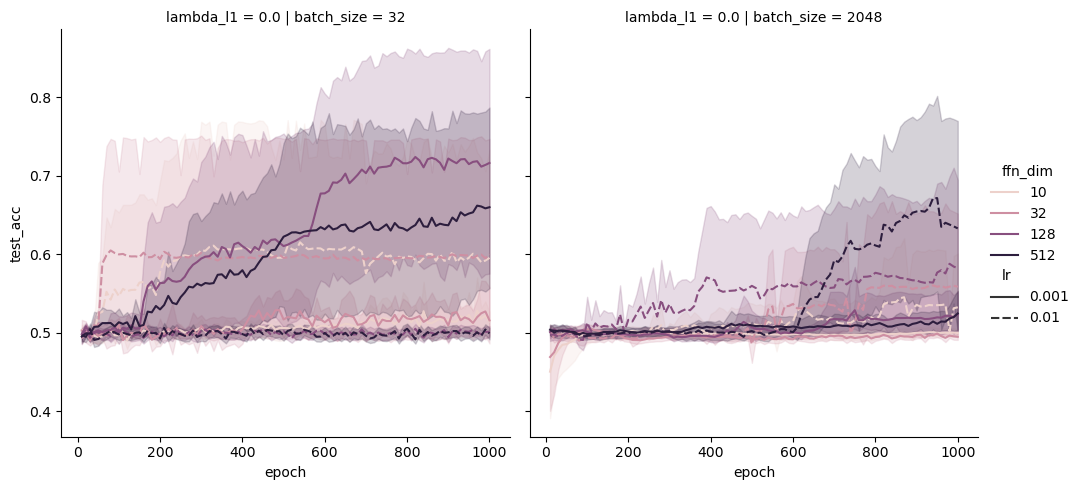

In [108]:
# data.groupby(['id']).plot(x='epoch', y=['loss', 'test_loss', 'acc', 'test_acc'], legend=True, subplots=[('loss', 'test_loss'), ('acc', 'test_acc')], figsize=(10, 4))
# data.drop(columns=['id']).groupby(['batch_size', 'nb_epochs', 'lambda_l1', 'lr', 'emb_dim', 'nb_emb', 'ffn_dim', 'ffn_bias', 'ffn_dropout', 'activation', 'epoch']).mean().reset_index().groupby(['batch_size', 'nb_epochs', 'lambda_l1', 'lr', 'emb_dim', 'nb_emb', 'ffn_dim', 'ffn_bias', 'ffn_dropout', 'activation']).plot(x='epoch', y=['loss', 'test_loss', 'acc', 'test_acc'], legend=True, subplots=[('loss', 'test_loss'), ('acc', 'test_acc')], figsize=(10, 4))
# for group in data.groupby(['id']):
#     plt.figure()
#     sns.lineplot(x='epoch', y='test_acc', data=group[1], label=group[0])

condition = 'epoch % 10 == 0 and lambda_l1 == 0.0'

sns.relplot(x='epoch', y='test_acc', data=data.query(condition), kind='line', hue='ffn_dim', hue_norm=mpl.colors.LogNorm(), style='lr', col='batch_size', row='lambda_l1')

/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


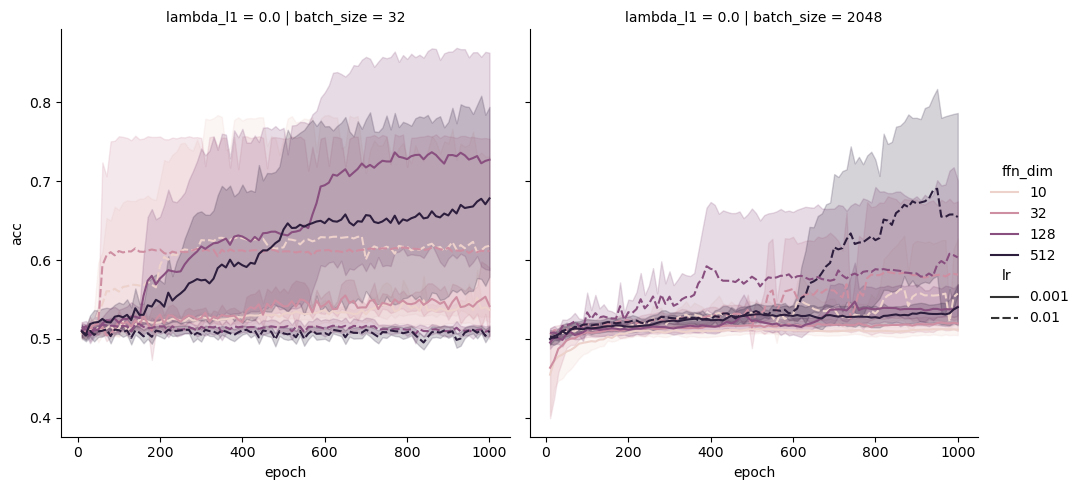

In [109]:
# data.groupby(['id']).plot(x='epoch', y=['loss', 'test_loss', 'acc', 'test_acc'], legend=True, subplots=[('loss', 'test_loss'), ('acc', 'test_acc')], figsize=(10, 4))
# data.drop(columns=['id']).groupby(['batch_size', 'nb_epochs', 'lambda_l1', 'lr', 'emb_dim', 'nb_emb', 'ffn_dim', 'ffn_bias', 'ffn_dropout', 'activation', 'epoch']).mean().reset_index().groupby(['batch_size', 'nb_epochs', 'lambda_l1', 'lr', 'emb_dim', 'nb_emb', 'ffn_dim', 'ffn_bias', 'ffn_dropout', 'activation']).plot(x='epoch', y=['loss', 'test_loss', 'acc', 'test_acc'], legend=True, subplots=[('loss', 'test_loss'), ('acc', 'test_acc')], figsize=(10, 4))
# for group in data.groupby(['id']):
#     plt.figure()
#     sns.lineplot(x='epoch', y='test_acc', data=group[1], label=group[0])

condition = 'epoch % 10 == 0 and lambda_l1 == 0.0'

sns.relplot(x='epoch', y='acc', data=data.query(condition), kind='line', hue='ffn_dim', hue_norm=mpl.colors.LogNorm(), style='lr', col='batch_size', row='lambda_l1')

## Mk2

In [110]:
EXP_DIR = Path('./results/Mk2')
configs_db = pd.read_json(EXP_DIR / 'config.jsonl', lines=True).dropna()

In [111]:
configs_db

,vocab_size,seq_length,sparsity_index,nb_data,batch_size,nb_epochs,lambda_l1,lr,emb_dim,nb_emb,ffn_dim,ffn_bias,ffn_dropout,activation,seed,save_weights,interactive,id
0,2,12,5,2048,2048,1000,0,0.1000,2,3,10,True,0,gelu,3,False,False,3cb7fb5544284a9dbbc17e8c08d472f1
1,2,12,5,2048,2048,1000,0,0.1000,2,3,10,True,0,gelu,2,False,False,a212b8b937d849d4b4e35b1757c21aca
2,2,12,5,2048,2048,1000,0,0.1000,2,3,10,True,0,gelu,0,False,False,b63d09dbad4f452a80b54e4228e9d78e
3,2,12,5,2048,2048,1000,0,0.1000,2,3,10,True,0,gelu,1,False,False,728a41fdea4b448c8ee24e6360b55757
4,2,12,5,2048,2048,1000,0,0.0300,2,3,32,True,0,gelu,5,False,False,5707921cc838476587ac71950e6b0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,2,12,5,2048,2048,1000,0,0.0003,2,3,512,True,0,gelu,6,False,False,f28e795eef5a46699340a98a7b47c29d
254,2,12,5,2048,2048,1000,0,0.0003,2,3,512,True,0,gelu,4,False,False,eff5988f73514354932dc38612a1ddd2
255,2,12,5,2048,2048,1000,0,0.0006,2,3,512,True,0,gelu,1,False,False,bb1df9da6a244b13ab3c9445e7828fbe
256,2,12,5,2048,2048,1000,0,0.0030,2,3,128,True,0,gelu,0,False,False,6e900103016142c594bffb8c1a8c8a98


#### Debug

In [ ]:
a = torch.stack([np.load('./results/0b6b72ff22594f91a8d7618816183eb2/accs.pkl', allow_pickle=True), np.load('./results/0b6b72ff22594f91a8d7618816183eb2/losses.pkl', allow_pickle=True)])

In [ ]:
pd.DataFrame(a.T, columns=['acc', 'loss'])

,acc,loss
0,0.474121,0.994479
1,0.474121,0.971928
2,0.474121,0.951452
3,0.474121,0.932563
4,0.474121,0.914944
...,...,...
995,0.540039,0.688361
996,0.538574,0.688359
997,0.539062,0.688358
998,0.540039,0.688357


In [ ]:
row = configs_db.iloc[0]
pd.DataFrame(
        torch.stack([
            np.load(f'./results/{row.id}/accs.pkl', allow_pickle=True),
            np.load(f'./results/{row.id}/losses.pkl', allow_pickle=True),
            np.load(f'./results/{row.id}/test_accs.pkl', allow_pickle=True),
            np.load(f'./results/{row.id}/test_losses.pkl', allow_pickle=True)
        ]).T,
        columns=['acc', 'loss', 'test_acc', 'test_loss'],
        index=np.arange(1, 1001)
    ).assign(**row.to_dict() | {'epoch': np.arange(1, 1001)}).reset_index()

,index,acc,loss,test_acc,test_loss,vocab_size,seq_length,sparsity_index,nb_data,batch_size,...,nb_emb,ffn_dim,ffn_bias,ffn_dropout,activation,seed,save_weights,interactive,id,epoch
0,1,0.304199,1.121874,0.283203,1.128062,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,1
1,2,0.437988,1.076825,0.414062,1.084278,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,2
2,3,0.498047,1.041459,0.485840,1.049656,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,3
3,4,0.509277,1.014917,0.499023,1.023722,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,4
4,5,0.509277,0.995406,0.499023,1.005054,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.529297,0.691170,0.509766,0.694712,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,996
996,997,0.529297,0.691169,0.509766,0.694711,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,997
997,998,0.529297,0.691168,0.509766,0.694711,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,998
998,999,0.529297,0.691167,0.508789,0.694710,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,999


#### Plain

In [112]:
data = pd.concat([
    pd.DataFrame(
        torch.stack([
            np.load(EXP_DIR / f'{row.id}/accs.pkl', allow_pickle=True),
            np.load(EXP_DIR / f'{row.id}/losses.pkl', allow_pickle=True),
            np.load(EXP_DIR / f'{row.id}/test_accs.pkl', allow_pickle=True),
            np.load(EXP_DIR / f'{row.id}/test_losses.pkl', allow_pickle=True)
        ]).T,
        columns=['acc', 'loss', 'test_acc', 'test_loss']
    ).assign(**row._asdict() | {'epoch': np.arange(1, 1001)})
    for row in tqdm(configs_db.itertuples(), total=len(configs_db)) if Path(EXP_DIR / f'{row.id}').exists()
    # and (row.model_seed in subset_exp)
]).reset_index(drop=True)

100%|██████████| 258/258 [00:03<00:00, 81.25it/s]


In [113]:
data

,acc,loss,test_acc,test_loss,Index,vocab_size,seq_length,sparsity_index,nb_data,batch_size,nb_epochs,lambda_l1,lr,emb_dim,nb_emb,ffn_dim,ffn_bias,ffn_dropout,activation,seed,save_weights,interactive,id,epoch
0,0.509277,1.025185,0.499023,1.043177,0,2,12,5,2048,2048,1000,0,0.100,2,3,10,True,0,gelu,3,False,False,3cb7fb5544284a9dbbc17e8c08d472f1,1
1,0.509277,0.929430,0.499023,0.943630,0,2,12,5,2048,2048,1000,0,0.100,2,3,10,True,0,gelu,3,False,False,3cb7fb5544284a9dbbc17e8c08d472f1,2
2,0.509277,0.860867,0.499023,0.869368,0,2,12,5,2048,2048,1000,0,0.100,2,3,10,True,0,gelu,3,False,False,3cb7fb5544284a9dbbc17e8c08d472f1,3
3,0.509277,0.823933,0.499023,0.828755,0,2,12,5,2048,2048,1000,0,0.100,2,3,10,True,0,gelu,3,False,False,3cb7fb5544284a9dbbc17e8c08d472f1,4
4,0.509277,0.781331,0.499023,0.783836,0,2,12,5,2048,2048,1000,0,0.100,2,3,10,True,0,gelu,3,False,False,3cb7fb5544284a9dbbc17e8c08d472f1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255995,0.523438,0.686145,0.501953,0.707678,257,2,12,5,2048,2048,1000,0,0.006,2,3,128,True,0,gelu,8,False,False,eeeea853ba0b4e0dbe0d35474ea6fbaa,996
255996,0.527344,0.686149,0.489746,0.708952,257,2,12,5,2048,2048,1000,0,0.006,2,3,128,True,0,gelu,8,False,False,eeeea853ba0b4e0dbe0d35474ea6fbaa,997
255997,0.521973,0.686152,0.502441,0.707666,257,2,12,5,2048,2048,1000,0,0.006,2,3,128,True,0,gelu,8,False,False,eeeea853ba0b4e0dbe0d35474ea6fbaa,998
255998,0.526855,0.686150,0.490723,0.709084,257,2,12,5,2048,2048,1000,0,0.006,2,3,128,True,0,gelu,8,False,False,eeeea853ba0b4e0dbe0d35474ea6fbaa,999


In [114]:
data.columns

Index(['acc', 'loss', 'test_acc', 'test_loss', 'Index', 'vocab_size',
       'seq_length', 'sparsity_index', 'nb_data', 'batch_size', 'nb_epochs',
       'lambda_l1', 'lr', 'emb_dim', 'nb_emb', 'ffn_dim', 'ffn_bias',
       'ffn_dropout', 'activation', 'seed', 'save_weights', 'interactive',
       'id', 'epoch'],
      dtype='object')

In [115]:
pd.set_option('display.max_columns', None)

In [116]:
data.query('epoch == 999 and test_acc > 0.8')

,acc,loss,test_acc,test_loss,Index,vocab_size,seq_length,sparsity_index,nb_data,batch_size,nb_epochs,lambda_l1,lr,emb_dim,nb_emb,ffn_dim,ffn_bias,ffn_dropout,activation,seed,save_weights,interactive,id,epoch
7998,1.000000,0.000249,1.000000,0.000249,7,2,12,5,2048,2048,1000,0,0.030,2,3,128,True,0,gelu,6,False,False,1b24bc686ed14d8683bb3aef415f9429,999
41998,0.890137,0.249268,0.898926,0.240040,42,2,12,5,2048,2048,1000,0,0.030,2,3,128,True,0,gelu,0,False,False,d9a1bb536832499494a1c642fb8a052d,999
92998,0.915527,0.250065,0.915039,0.251818,94,2,12,5,2048,2048,1000,0,0.006,2,3,512,True,0,gelu,9,False,False,7f5b558c859c4320b809f76c77b7ded5,999
104998,0.957520,0.165124,0.951172,0.170424,106,2,12,5,2048,2048,1000,0,0.010,2,3,512,True,0,gelu,9,False,False,6ff6540b46c94aaba37cc527cabc112d,999
117998,0.963379,0.164409,0.962402,0.170240,119,2,12,5,2048,2048,1000,0,0.010,2,3,512,True,0,gelu,5,False,False,3ead0f1d10b34f45a0acf04a74f24565,999
121998,0.847168,0.393966,0.840332,0.398512,123,2,12,5,2048,2048,1000,0,0.010,2,3,10,True,0,gelu,6,False,False,67e7d268a3884192aba36527dfdf2cf3,999
122998,0.942383,0.151197,0.936035,0.162358,124,2,12,5,2048,2048,1000,0,0.010,2,3,512,True,0,gelu,4,False,False,0f32379ae6f841b2a85c0252fa6f180b,999
134998,1.000000,0.007667,1.000000,0.006983,136,2,12,5,2048,2048,1000,0,0.006,2,3,128,True,0,gelu,5,False,False,8dc542a10d834cf2ab3a1613648d4385,999
147998,0.963379,0.164789,0.962402,0.171951,149,2,12,5,2048,2048,1000,0,0.006,2,3,512,True,0,gelu,5,False,False,de32c628ca1144e4a657048d1d08250b,999
152998,0.962891,0.154647,0.964355,0.154053,154,2,12,5,2048,2048,1000,0,0.010,2,3,32,True,0,gelu,8,False,False,aa6d15a9bf8846dc8ddbd5eb89de11e3,999


/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-p

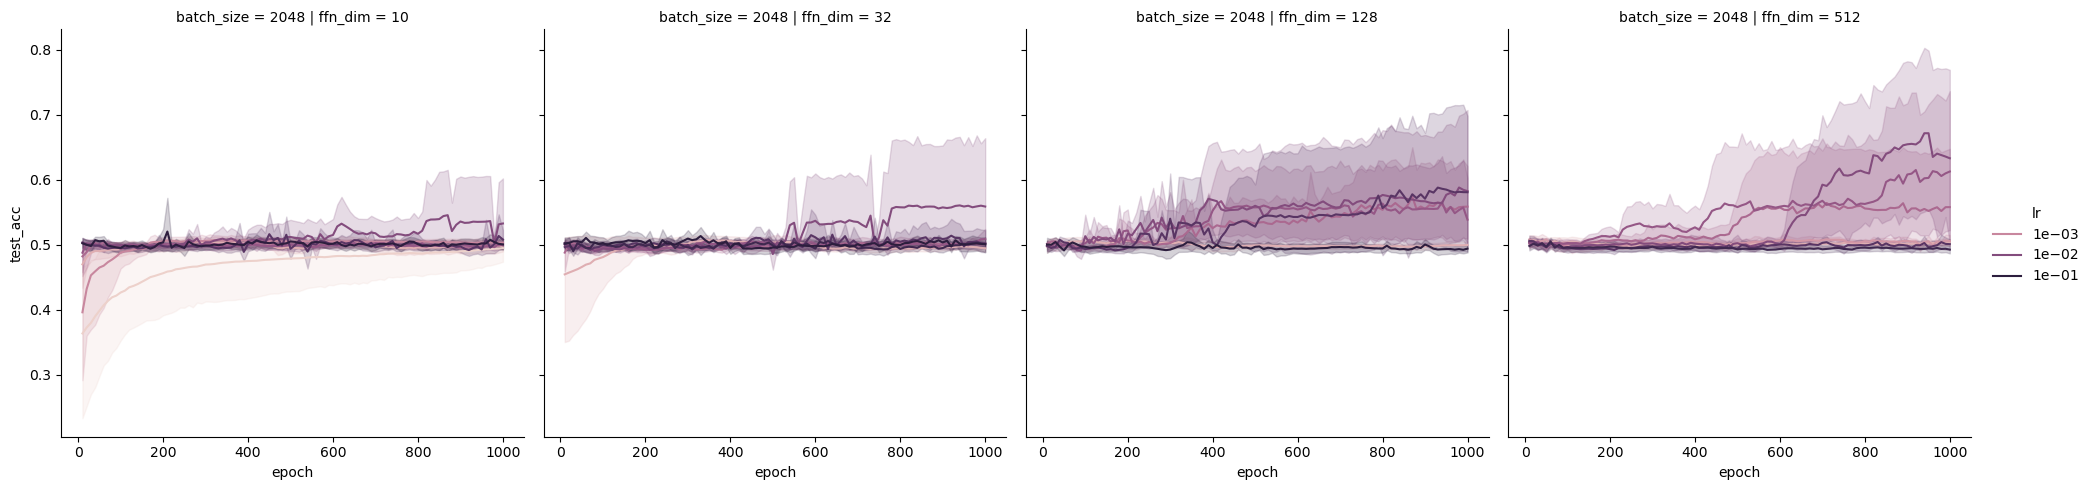

In [119]:
# data.groupby(['id']).plot(x='epoch', y=['loss', 'test_loss', 'acc', 'test_acc'], legend=True, subplots=[('loss', 'test_loss'), ('acc', 'test_acc')], figsize=(10, 4))
# data.drop(columns=['id']).groupby(['batch_size', 'nb_epochs', 'lambda_l1', 'lr', 'emb_dim', 'nb_emb', 'ffn_dim', 'ffn_bias', 'ffn_dropout', 'activation', 'epoch']).mean().reset_index().groupby(['batch_size', 'nb_epochs', 'lambda_l1', 'lr', 'emb_dim', 'nb_emb', 'ffn_dim', 'ffn_bias', 'ffn_dropout', 'activation']).plot(x='epoch', y=['loss', 'test_loss', 'acc', 'test_acc'], legend=True, subplots=[('loss', 'test_loss'), ('acc', 'test_acc')], figsize=(10, 4))
# for group in data.groupby(['id']):
#     plt.figure()
#     sns.lineplot(x='epoch', y='test_acc', data=group[1], label=group[0])

condition = 'epoch % 10 == 0'

sns.relplot(x='epoch', y='test_acc', data=data.query(condition), kind='line', hue='lr', hue_norm=mpl.colors.LogNorm(), legend='full', row='batch_size', col='ffn_dim')

/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = gr

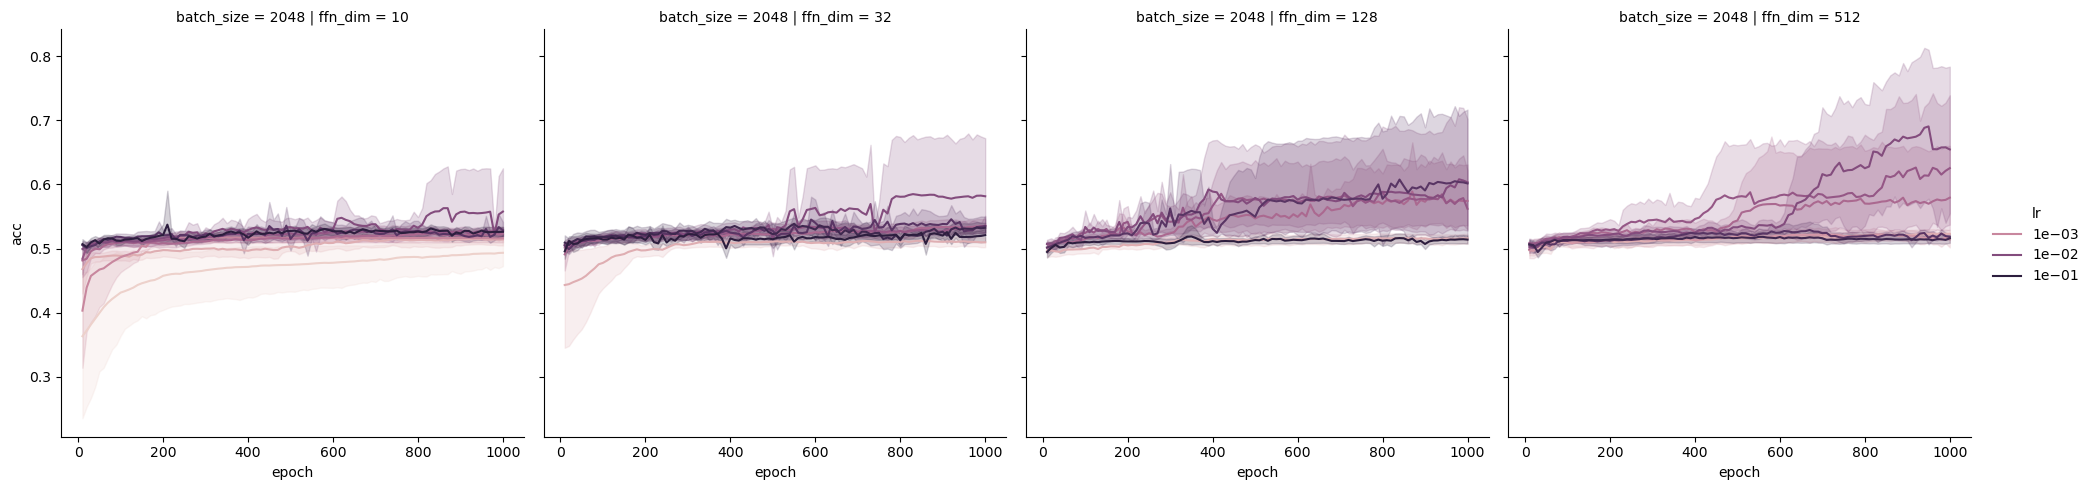

In [120]:
# data.groupby(['id']).plot(x='epoch', y=['loss', 'test_loss', 'acc', 'test_acc'], legend=True, subplots=[('loss', 'test_loss'), ('acc', 'test_acc')], figsize=(10, 4))
# data.drop(columns=['id']).groupby(['batch_size', 'nb_epochs', 'lambda_l1', 'lr', 'emb_dim', 'nb_emb', 'ffn_dim', 'ffn_bias', 'ffn_dropout', 'activation', 'epoch']).mean().reset_index().groupby(['batch_size', 'nb_epochs', 'lambda_l1', 'lr', 'emb_dim', 'nb_emb', 'ffn_dim', 'ffn_bias', 'ffn_dropout', 'activation']).plot(x='epoch', y=['loss', 'test_loss', 'acc', 'test_acc'], legend=True, subplots=[('loss', 'test_loss'), ('acc', 'test_acc')], figsize=(10, 4))
# for group in data.groupby(['id']):
#     plt.figure()
#     sns.lineplot(x='epoch', y='test_acc', data=group[1], label=group[0])

condition = 'epoch % 10 == 0'

sns.relplot(x='epoch', y='acc', data=data.query(condition), kind='line', hue='lr', hue_norm=mpl.colors.LogNorm(), row='batch_size', col='ffn_dim')